<a href="https://colab.research.google.com/github/wyatthf/PHYS434Lab1/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1


## 1-2. Downloading Data set and selecting features to study

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-deep')

In [ ]:
# Getting data from file
df = pd.read_csv('HTRU_2.csv')
# I will be studying the profile attributes
profMean = df['profMean']
profSTD = df['profSTD']
profKurt = df['profKurt']
profSkew = df['profSkew']
pulsarClass = df['class']

In [ ]:
# Sorting data into the two classes
realMean = []
realSTD = []
realKurt = []
realSkew = []
realPulsar = 0

falseMean = []
falseSTD = []
falseKurt = []
falseSkew = []
falsePulsar = 0


for i in range(len(pulsarClass)):
    if pulsarClass[i] == 1:
        realMean.append(profMean[i])
        realSTD.append(profSTD[i])
        realKurt.append(profKurt[i])
        realSkew.append(profSkew[i])
        realPulsar += 1
    else:
        falseMean.append(profMean[i])
        falseSTD.append(profSTD[i])
        falseKurt.append(profKurt[i])
        falseSkew.append(profSkew[i])
        falsePulsar += 1
        

## 3. Comparing shape of each feature between the two classes

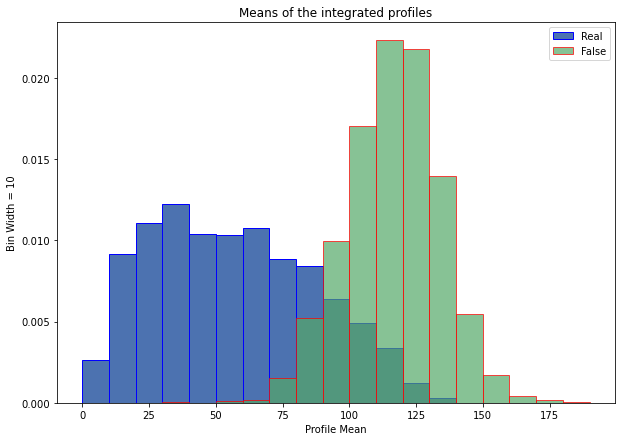

In [ ]:
# Creating means histogram

# Finding max range
maxMean = 0
realMax = max(realMean)
falseMax = max(falseMean)
if realMax <= falseMax:
    maxMean = falseMax
else:
    maxMean = realMax

bins = np.arange(0, maxMean, 10)
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(realMean, bins, alpha = 1, density = True, edgecolor='blue', label=['Real'])
ax.hist(falseMean, bins, alpha = 0.7, density = True, edgecolor='red', label=['False'])
plt.legend(loc='upper right')
plt.title("Means of the integrated profiles")
plt.xlabel("Profile Mean")
plt.ylabel("Bin Width = 10")

# Show plot
plt.show()

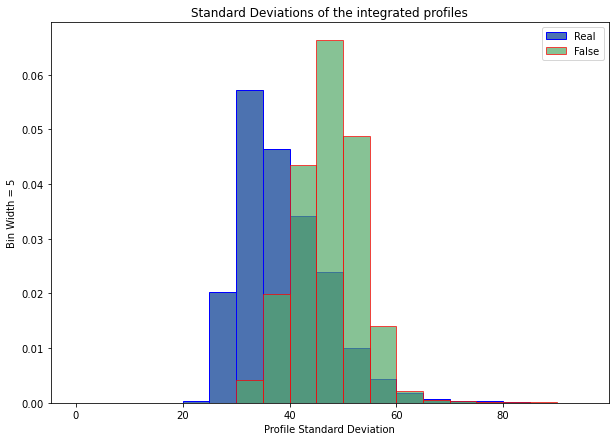

In [ ]:
# Creating Standard Deviation histogram
# Finding max range
maxSTD = 0
realMax = max(realSTD)
falseMax = max(falseSTD)
if realMax <= falseMax:
    maxSTD = falseMax
else:
    maxSTD = realMax

bins = np.arange(0, maxSTD, 5)
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(realSTD, bins, alpha = 1, density = True, edgecolor='blue', label=['Real'])
ax.hist(falseSTD, bins, alpha = 0.7, density = True, edgecolor='red',label=['False'])
plt.legend(loc='upper right')
plt.title("Standard Deviations of the integrated profiles")
plt.xlabel("Profile Standard Deviation")
plt.ylabel("Bin Width = 5")

# Show plot
plt.show()

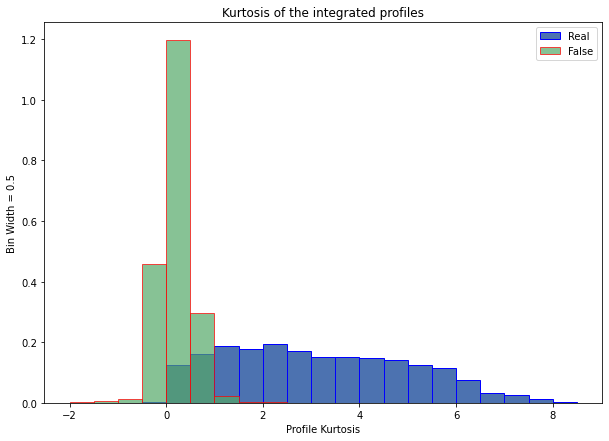

In [ ]:
# Creating Kurts histogram
# Finding max range


bins = np.arange(-2, 9, 0.5)
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(realKurt, bins, alpha = 1, density = True, edgecolor='blue', label='Real')
ax.hist(falseKurt, bins, alpha = 0.7, density = True, edgecolor='red', label='False')
plt.legend(loc='upper right')
plt.title("Kurtosis of the integrated profiles")
plt.xlabel("Profile Kurtosis")
plt.ylabel("Bin Width = 0.5")

# Show plot
plt.show()

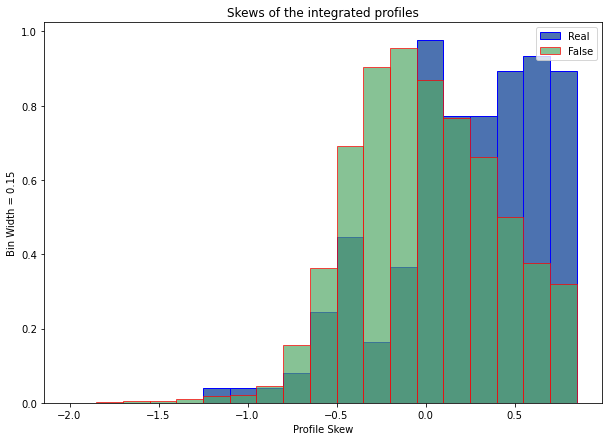

In [ ]:
# Creating skew histogram
bins = np.arange(-2,1,0.15)
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(realSkew, bins, alpha = 1, density = True, edgecolor='blue', label=['Real'])
ax.hist(falseSkew, bins, alpha = 0.7, density = True, edgecolor='red', label=['False'])
plt.legend(loc='upper right')
plt.title("Skews of the integrated profiles")
plt.xlabel("Profile Skew")
plt.ylabel("Bin Width = 0.15")

# Show plot
plt.show()

## 4. Probabilities


### Probability that an observation is a pulsar candidate, P(A). In other words, if an observation from the HTRU dataset is chosen at random, what is the probability that it is a real pulsar?


In [ ]:
totalObservations = len(pulsarClass)
totalObservations

17898

In [ ]:
realPulsar

1639

In [ ]:
candidateProb = realPulsar/totalObservations
print('Probability that an observation is a pulsar candidate is ' + str(candidateProb) + ' or ' + str(candidateProb*100) + '%')

Probability that an observation is a pulsar candidate is 0.09157447759526204 or 9.157447759526203%


### Probability than an observation with Mean of the integrated profile < 80, P(B).

In [ ]:
inRange = 0
for i in range(totalObservations):
    if profMean[i] < 80:
        inRange += 1
lowMeanProb = inRange/totalObservations
print('Probability that an observation has a mean of the integrated profile < 80 is ' + str(lowMeanProb) + ' or ' + str((lowMeanProb)*100) + '%')

Probability that an observation has a mean of the integrated profile < 80 is 0.08626662196893507 or 8.626662196893507%


### Probability that an observation satisfies both conditions, P(A ⋂ B).

In [ ]:
success = 0
for i in range(totalObservations):
    if profMean[i] < 80 and pulsarClass[i] == 1:
        success += 1
bothProb = success/totalObservations

print('Probability that an observation satisfies both conditions is ' + str(bothProb) + ' or ' + str(bothProb*100) + '%')

Probability that an observation satisfies both conditions is 0.06900212314225053 or 6.900212314225053%


## 5. Compute following conditional probabilities using Bayes' theorem.

### For an obersvation with mean of the integrated profile < 80, what is the probability that it is a pulsar candidate?

In [ ]:
candidateMeanProb = bothProb/lowMeanProb
print('P{Candidate|Low Mean} = P{Candidate ⋂ Low Mean} / P{Low Mean}')
print("Probability is " + str(candidateMeanProb))

P{Candidate|Low Mean} = P{Candidate ⋂ Low Mean} / P{Low Mean}
Probability is 0.7998704663212436


### For a pulsar candidate, what is the probability that its Mean of the integrated profile < 80?

In [ ]:
meanCandidateProb = bothProb/candidateProb
print('P{Low Mean|Candidate} = P{Candidate ⋂ Low Mean} / P{Candidate}')
print("Probability is " + str(meanCandidateProb))

P{Low Mean|Candidate} = P{Candidate ⋂ Low Mean} / P{Candidate}
Probability is 0.7535082367297132


## Cumulative probability for varying Z

In [ ]:
from scipy.stats import norm

### Calculate cumulative probabaility from mean for Z = 1, 3 and 5.

In [ ]:
norm.cdf(1,1)

0.5

In [ ]:
norm.cdf(3,3)

0.5

In [ ]:
norm.cdf(5,5)

0.5

### Calculate cumulative probabaility for Z = 1, 3 and 5.

In [ ]:
norm.cdf(1)

0.8413447460685429

In [ ]:
norm.cdf(3)

0.9986501019683699

In [ ]:
norm.cdf(5)

0.9999997133484281

### Calculate complementary cumulative probabaility for Z = 1, 3 and 5.

In [ ]:
norm.cdf(-1)

0.15865525393145707

In [ ]:
norm.cdf(-3)

0.0013498980316300933

In [ ]:
norm.cdf(-5)

2.866515718791933e-07

### Higgs Discovery Z-Score

In [ ]:
norm.cdf(5.9) # last question

0.9999999981824922

#### That is the corresponding p-value